In [1]:
import glob
import torch

c:\Users\lopez\Anaconda3\envs\test_install_cuda_with_pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
glob.glob('E:/Jose/models/model_9_0_1668242975_epoch_2_loss_0.21454372439322444.pt')

['E:/Jose/models/model_9_0_1668242975_epoch_2_loss_0.21454372439322444.pt']

In [3]:
from lucent.modelzoo import vgg19, util
from cadena_model import VggModel
vgg_pretrained = vgg19(pretrained = True)
vgge = VggModel(vgg_pretrained)


c:\Users\lopez\Anaconda3\envs\test_install_cuda_with_pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\lopez\Anaconda3\envs\test_install_cuda_with_pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


conv_layer:   0 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.0
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
dict_keys(['features.0']) torch.Size([1, 64, 224, 224])
[64, 224, 224, 43]


In [4]:
from lucent.optvis import render, param, transform, objectives
from lucent.modelzoo.util import get_model_layers

In [5]:
gpu_to_use = 0
n_neurons = 43
layer = 0


GPU = torch.cuda.is_available()
net = VggModel(pretrained_model=vgg_pretrained, conv_layer=layer, num_neurons=n_neurons, device = torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu"))
net.cuda()

#print('\n1/5  Model loading...')
#net.load_state_dict(torch.load('E:/Jose/models/model_9_0_1668242975_epoch_2_loss_0.21454372439322444.pt', map_location=torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu")))

conv_layer:   0 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.0
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
dict_keys(['features.0']) torch.Size([1, 64, 224, 224])
[64, 224, 224, 43]


VggModel(
  (vgg_pretrained): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
  

100%|██████████| 512/512 [00:21<00:00, 23.42it/s]



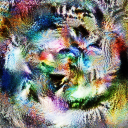

In [6]:
img = render.render_vis(net, 'output:42', show_inline=1)

In [9]:
GPU = torch.cuda.is_available()
net1 = VggModel(pretrained_model=vgg_pretrained, conv_layer=layer, num_neurons=n_neurons, device = torch.device("cuda:"+str(gpu_to_use) if GPU else "cpu"))

conv_layer:   0 <class 'int'>
FTE:          [0, 2, 5, 7, 10, 12, 14, 16, 19, 21, 23, 25, 28, 30, 32, 34]
conv in FTE True



features.0
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [28]:
roi_name = '9'
print('\n2/5   Loading Paolo\'s model')
from neural_model import Model
from lucent.modelzoo import inceptionv1, util, inceptionv1_avgPool
import pickle
import numpy as np

def load_trained_model(roi_name,layer=False):
    if not layer:
        data_filename = 'E:/Jose/snapshots/grid_search_array'+ roi_name +'.pkl'
        f = open(data_filename,"rb")
        cc = pickle.load(f)
        val_corrs = cc['val_corrs']
        params = cc['params']
        val_corrs = np.array(val_corrs)
        layer = params[np.where(val_corrs==val_corrs.max())[0][0].astype('int')][0]
    data_filename      = 'E:/Jose/Data/data_THINGS_array'+ roi_name +'_v1.pkl'
    #data_filename = '/media/stijn/2bb74e85-3681-4561-88b7-abd98482de61/paolo/Data/data_THINGS_array'+ roi_name +'_v1.pkl'
    f = open(data_filename,"rb")
    cc = pickle.load(f)
    val_data = cc['val_data']
    del cc
    
    n_neurons = val_data.shape[1]

    pretrained_model = inceptionv1(pretrained=True)
    roi_model = Model(pretrained_model,layer,n_neurons,device='cpu')
    snapshot_path = f'E:/Jose/snapshots/array'+ roi_name +'_neural_model.pt'
    roi_model.load_state_dict(torch.load(snapshot_path,map_location=torch.device('cpu')))
    return roi_model,n_neurons


model_paolo, n_neurons = load_trained_model(roi_name)
print('      Loaded\n')



2/5   Loading Paolo's model
mixed4a
CatLayer()
      Loaded



In [31]:
model_paolo.to('cuda:0').eval()

Model(
  (ann): InceptionV1(
    (conv2d0_pre_relu_conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2))
    (conv2d1_pre_relu_conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (conv2d2_pre_relu_conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1))
    (mixed3a_1x1_pre_relu_conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
    (mixed3a_3x3_bottleneck_pre_relu_conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
    (mixed3a_5x5_bottleneck_pre_relu_conv): Conv2d(192, 16, kernel_size=(1, 1), stride=(1, 1))
    (mixed3a_pool_reduce_pre_relu_conv): Conv2d(192, 32, kernel_size=(1, 1), stride=(1, 1))
    (mixed3a_3x3_pre_relu_conv): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1))
    (mixed3a_5x5_pre_relu_conv): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (mixed3b_1x1_pre_relu_conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
    (mixed3b_3x3_bottleneck_pre_relu_conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
    (mixed3b_5x5_bot

100%|██████████| 512/512 [00:46<00:00, 11.08it/s]



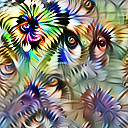

In [37]:
img_paolo = render.render_vis(model_paolo, 'output:30', show_inline =1)

100%|██████████| 512/512 [00:20<00:00, 24.62it/s]



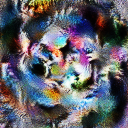

In [ ]:
img = render.render_vis(net, 'output:30', show_inline=1)

In [41]:
img[0].shape

(1, 128, 128, 3)

In [42]:
$LUCENT-PATH

SyntaxError: invalid syntax (1358281745.py, line 1)